<h1 align=center><u>GRA TASK:</u> Food Word Embedding and Clustering</h1>
<h3 align=center>Name: Parth Kapadia</h3>
<h3 align=center>USC ID: 9467613537</h3>
<h3 align=center>Email ID: parthjil@usc.edu</h3>

### Overview: 
> The goal of this exercise is to cluster the provided textual data based on the semantic meaning of the words in the corpus provided.

### 1. Download the MenuItem dataset provided. 
> This dataset consists of 4,524 menu items from restaurant brands. Your goal is to cluster together restaurant brands based on their menu 
items being used in semantically similar contexts. We define the context of a restaurant brand to be all the menu items it sells.


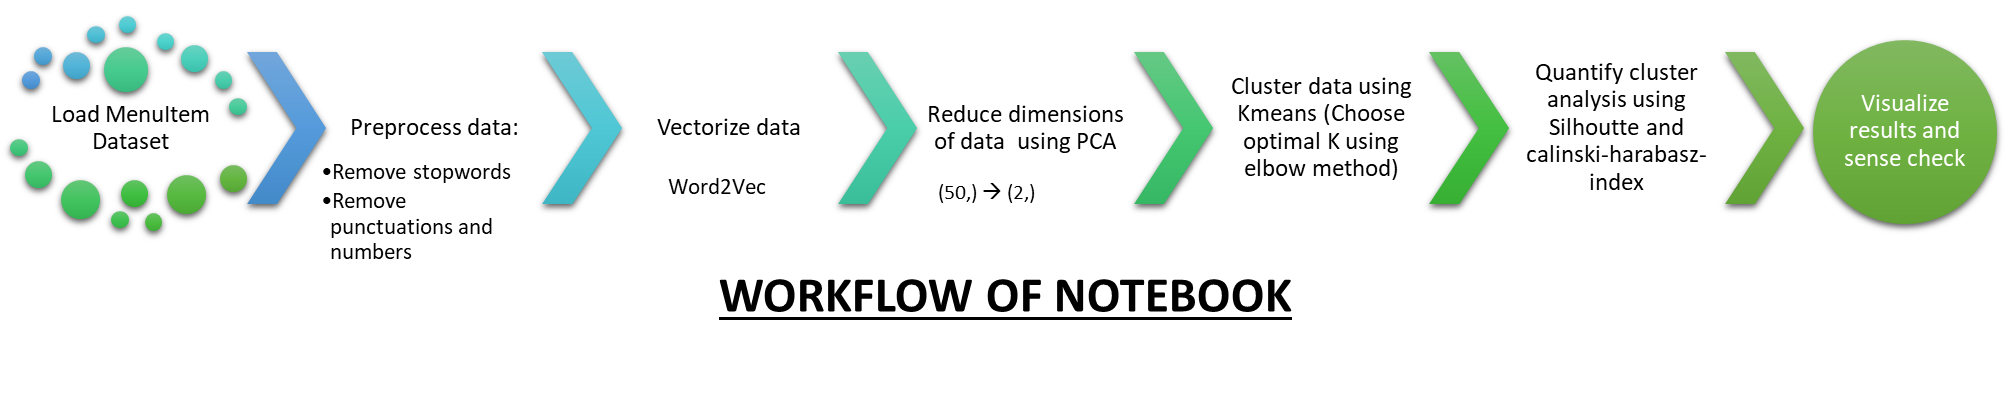

In [49]:
# Importing the required libraries
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import re
from gensim.models import Word2Vec
import gensim
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import calinski_harabasz_score


In [2]:
# Read data
df= pd.read_csv("MenuItem.csv")

In [3]:
df

,Restaurant Name,Original food Item
0,Coffee Time,Garden Vegetable Sandwich
1,HoSan,Roasted Seaweed Snack
2,Weight Watchers,Muffins
3,Natural Sea,"Albacore Tuna, Solid White"
4,World of Beer,Caesar Salad with Grilled Flat Iron Steak
...,...,...
4519,Moxie's Classic Grill,Spring Mix Starter Salad
4520,Thundercloud Subs,"Genoa Salami Low-Fat Sub, Large"
4521,Chick-fil-A,"Cookies & Cream Milkshake, Small"
4522,Cereality,2% Milk


In [4]:
df.head(30)

,Restaurant Name,Original food Item
0,Coffee Time,Garden Vegetable Sandwich
1,HoSan,Roasted Seaweed Snack
2,Weight Watchers,Muffins
3,Natural Sea,"Albacore Tuna, Solid White"
4,World of Beer,Caesar Salad with Grilled Flat Iron Steak
5,Chick-fil-A,"Honey Mustard Sauce, 8 oz (Catering)"
6,Tai Pei,Pork Potstickers
7,Port of Subs,Top Deck Meat & Cheese Champion - 20-25 Guests *
8,YoCream,Plain
9,Blimpie,"Sprite Zero, 28 oz"


### 2. Perform any data preprocessing, if necessary, to improve your final results.
> This is a food time menu so any punctuations will not be uselful to determine the end resutls and also as a go to practise I believe its important to remove stopwords for any NLP problem as they have really low value for language modelling 

> Similarly numbers also won't help us in clustering e.g. 2% milk vs milk, we are concerned about the restaurants selling milk as they will be clustered in one.  

> Therefore, I will be removing the punctuations, numbers making all the letters to lower case and remove stopwords.

In [5]:
set_of_stopwords = set(stopwords.words("english"))
set_of_stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [6]:
# Making our preprocessing functions
stop = stopwords.words('english')
def preprocess(text):
    inp = re.sub('[^a-zA-Z1-9]+', ' ', str(text))
    out = re.sub(r'\d+', '',inp)
    return out.lower().strip()

def remove_stopwords(text):
    filter_words = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(filter_words)

df['Original food Item'] = df['Original food Item'].map(preprocess)
df['Original food Item'] = df['Original food Item'].map(remove_stopwords)

In [7]:
df

,Restaurant Name,Original food Item
0,Coffee Time,garden vegetable sandwich
1,HoSan,roasted seaweed snack
2,Weight Watchers,muffins
3,Natural Sea,albacore tuna solid white
4,World of Beer,caesar salad grilled flat iron steak
...,...,...
4519,Moxie's Classic Grill,spring mix starter salad
4520,Thundercloud Subs,genoa salami low fat sub large
4521,Chick-fil-A,cookies cream milkshake small
4522,Cereality,milk


In [8]:
df.head(30)

,Restaurant Name,Original food Item
0,Coffee Time,garden vegetable sandwich
1,HoSan,roasted seaweed snack
2,Weight Watchers,muffins
3,Natural Sea,albacore tuna solid white
4,World of Beer,caesar salad grilled flat iron steak
5,Chick-fil-A,honey mustard sauce oz catering
6,Tai Pei,pork potstickers
7,Port of Subs,top deck meat cheese champion guests
8,YoCream,plain
9,Blimpie,sprite zero oz


### 3. Train an embedding model: 
> Use the preprocessed dataset with a state-of-the-art (SOTA) embedding method of your choice (e.g., Word2Vec or BERT sentence embedding) to produce a vector representation of the data.


In [9]:
#building word corpus
def corpus_building(data):
    corpus = []
    for sentence in data.iteritems():
        word_list = sentence[1].split(" ")
        corpus.append(word_list)
    return corpus

In [10]:
corpus = corpus_building(df['Original food Item'])

In [11]:
corpus

[['garden', 'vegetable', 'sandwich'],
 ['roasted', 'seaweed', 'snack'],
 ['muffins'],
 ['albacore', 'tuna', 'solid', 'white'],
 ['caesar', 'salad', 'grilled', 'flat', 'iron', 'steak'],
 ['honey', 'mustard', 'sauce', 'oz', 'catering'],
 ['pork', 'potstickers'],
 ['top', 'deck', 'meat', 'cheese', 'champion', 'guests'],
 ['plain'],
 ['sprite', 'zero', 'oz'],
 ['limeade', 'cherry', 'habanero', 'oz'],
 ['jack', 'cheese'],
 ['tuna', 'sub', 'large'],
 ['mediterranean', 'lettuce', 'wrap'],
 ['jasmine', 'rice'],
 ['chicken', 'pecan', 'salad', 'sandwich', 'white', 'roll'],
 ['meatless', 'burgers'],
 ['pepper', 'jack', 'cheese', 'double', 'large', 'sub'],
 ['pomodoro', 'pizza', 'inch', 'slice'],
 ['breakfast', 'club', 'bacon'],
 ['cobb', 'salad', 'nuggets'],
 ['swiss', 'muesli', 'original', 'recipe'],
 ['country', 'fried', 'potatoes'],
 ['snickers',
  'iced',
  'coffee',
  'oz',
  'flavor',
  'choice',
  'sugar',
  'free',
  'vanilla',
  'flavor'],
 ['pink', 'bubblegum', 'ice', 'cream', 'oz', 'sc

In [12]:
# initialiizing word2vec
model = Word2Vec(corpus,min_count=1, vector_size=50)

In [13]:
for index, word in enumerate(model.wv.index_to_key):
    if index == 10:
        break
    print(f"word #{index}/{len(model.wv.index_to_key)} is {word}")

word #0/2021 is chicken
word #1/2021 is oz
word #2/2021 is cheese
word #3/2021 is pizza
word #4/2021 is large
word #5/2021 is cream
word #6/2021 is chocolate
word #7/2021 is sauce
word #8/2021 is salad
word #9/2021 is small


In [14]:
def vectorizer(sentence, model):
    vec=[]
    vec=[]  
    for words in sentence.split():
        vec.append(model.wv[words])
    return vec

In [15]:
vectors = []
for sentence in df['Original food Item']:
    vectors.append(vectorizer(sentence, model))

In [16]:
len(vectors)

4524

In [17]:
df['vectors']=vectors

In [18]:
# lets check the dataset with vectors
df.head()

,Restaurant Name,Original food Item,vectors
0,Coffee Time,garden vegetable sandwich,"[[0.01864488, -0.0029966638, 0.009325561, 0.00..."
1,HoSan,roasted seaweed snack,"[[0.01961007, 0.008235668, -0.01886356, -0.000..."
2,Weight Watchers,muffins,"[[-0.016387008, -0.0010765751, 0.012117162, -0..."
3,Natural Sea,albacore tuna solid white,"[[0.0065421998, -0.0043680565, -0.019522052, -..."
4,World of Beer,caesar salad grilled flat iron steak,"[[0.010350636, 0.0018764331, -0.013160196, -0...."


### You may need to use dimensionality reduction on the vectors obtained from the embedding model before applying the clustering algorithm.
> The vectors suggest that we will need to use dimensionality reduction as it will become computationally very expensive to deal with (50,) size vectors

In [27]:
X=[]
for val in df['vectors']:
    arr=np.zeros(50)
    for values in val:
        arr=np.add(arr,values)
    arr = arr/len(val)
    X.append(arr)

In [56]:
df['pca mapped']=X

In [29]:
#USING PCA to reduce dimensionality of data
pca = PCA(n_components=2)
PCA_result = pca.fit_transform(X)

In [30]:
PCA_result

array([[-0.01855169,  0.00950434],
       [-0.04006784,  0.00394142],
       [-0.40928768, -0.00265769],
       ...,
       [ 0.24240207, -0.01928323],
       [ 0.50310652, -0.01291594],
       [-0.05004358, -0.00216407]])

In [57]:
df.head()

,Restaurant Name,Original food Item,vectors,pca mapped,cluster
0,Coffee Time,garden vegetable sandwich,"[[0.01864488, -0.0029966638, 0.009325561, 0.00...","[0.02980019400517146, -0.018412029137834907, -...",0
1,HoSan,roasted seaweed snack,"[[0.01961007, 0.008235668, -0.01886356, -0.000...","[0.013634580265109738, 0.0007594876612226168, ...",0
2,Weight Watchers,muffins,"[[-0.016387008, -0.0010765751, 0.012117162, -0...","[-0.016387008130550385, -0.0010765751358121634...",1
3,Natural Sea,albacore tuna solid white,"[[0.0065421998, -0.0043680565, -0.019522052, -...","[0.01637248246697709, -0.0029670329531654716, ...",1
4,World of Beer,caesar salad grilled flat iron steak,"[[0.010350636, 0.0018764331, -0.013160196, -0....","[0.020443743094801903, -0.0092821722306932, -0...",0


### Cluster semantically similar ingredients / restaurant brands: 
> Use a SOTA clustering method (e.g., K-means, DBSCAN, hierarchical) to cluster together semantically similar ingredients (if using the Recipe dataset) OR restaurant brands (if using the MenuItem dataset) based on their being used in semantically similar contexts.

In [31]:
#Using elbow methos to determine optimal cluster
elbow = []

for i in range(1,11):
    kmeans= KMeans(n_clusters=i, init='k-means++', random_state=23)
    kmeans.fit(PCA_result)
    elbow.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

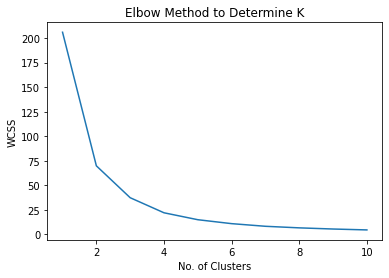

In [32]:
plt.plot(range(1,11),elbow)
plt.title('Elbow Method to Determine K')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')

In [ ]:
#the figure suggests that we use 3 as our k

In [33]:
n_clusters=3
clf = KMeans(n_clusters)

In [34]:
df['cluster']=clf.fit_predict(X)

In [35]:
df

,Restaurant Name,Original food Item,vectors,pca mapped,cluster
0,Coffee Time,garden vegetable sandwich,"[[0.01864488, -0.0029966638, 0.009325561, 0.00...","[[0.09785357862710953, -0.021140454337000847],...",0
1,HoSan,roasted seaweed snack,"[[0.01961007, 0.008235668, -0.01886356, -0.000...","[[0.7307456731796265, 0.016024315729737282], [...",0
2,Weight Watchers,muffins,"[[-0.016387008, -0.0010765751, 0.012117162, -0...","[[-0.055078014731407166, 8.208190411096439e-05]]",1
3,Natural Sea,albacore tuna solid white,"[[0.0065421998, -0.0043680565, -0.019522052, -...","[[-0.060390815138816833, 0.014196395874023438]...",1
4,World of Beer,caesar salad grilled flat iron steak,"[[0.010350636, 0.0018764331, -0.013160196, -0....","[[0.23760801553726196, 0.02091444842517376], [...",0
...,...,...,...,...,...
4519,Moxie's Classic Grill,spring mix starter salad,"[[0.018953692, -0.02233239, -0.0030386816, -0....","[[0.07211139798164368, 0.005173476412892342], ...",0
4520,Thundercloud Subs,genoa salami low fat sub large,"[[0.012579435, -0.00033564933, -0.00022311234,...","[[-0.0198303684592247, -0.0034096166491508484]...",0
4521,Chick-fil-A,cookies cream milkshake small,"[[0.048003517, 0.010205312, 0.01560179, -0.008...","[[0.5254807472229004, -0.01925087161362171], [...",2
4522,Cereality,milk,"[[0.059820328, -0.027533766, -0.006594844, 0.0...","[[0.8575432300567627, 0.0006599687621928751]]",2


### Evaluating the clusters: 
>Use quantitative metrics to evaluate the quality of the clusters. 

>Visualize the clusters in 1-2 interactive figures, including descriptive captions. 

>Feel free to describe the clusters (e.g., sense-check them) for meaning.

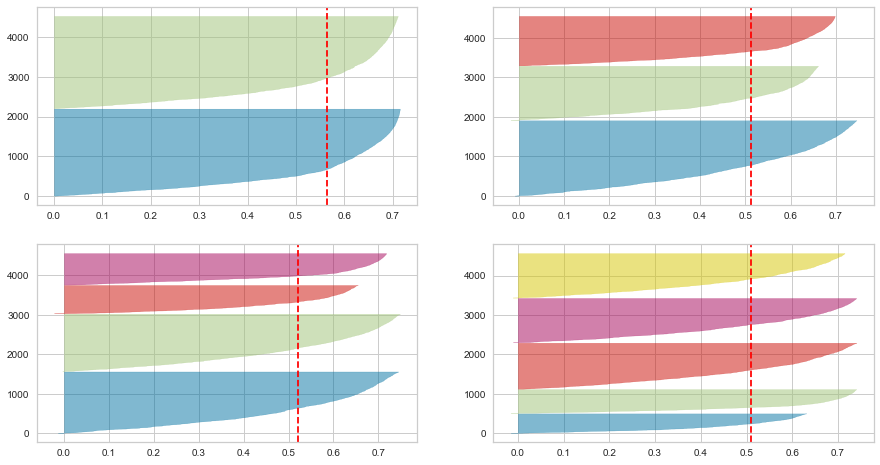

In [38]:
# References: https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(PCA_result)

>  All the clusters have the average silhoutte score more for all clusters. Therefore, The thickness of the silhouette plot representing each cluster becomes a deciding point. For the plot with n_cluster 3 (top right), the thickness is more uniform than others. Thus, one can select the optimal number of clusters as 3.

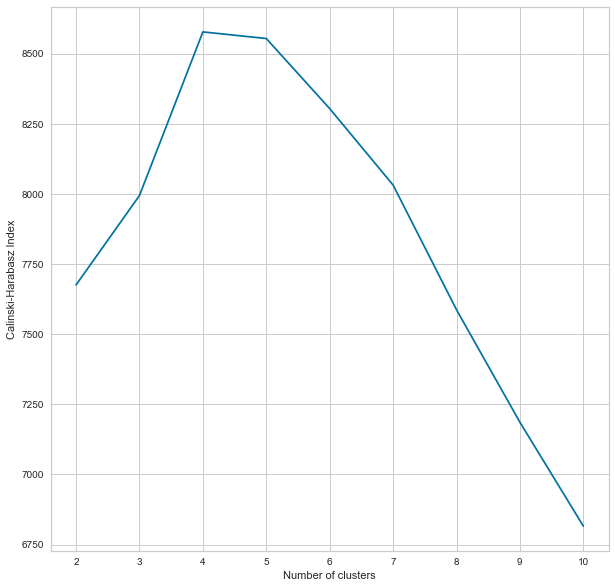

In [51]:
#https://pyshark.com/calinski-harabasz-index-for-k-means-clustering-evaluation-using-python/#calinski-harabasz-index-explained
results = {}
plt.rcParams["figure.figsize"] = (10,10)

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=30)
    labels = kmeans.fit_predict(PCA_result)
    db_index = calinski_harabasz_score(X, labels)
    results.update({i: db_index})

plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Calinski-Harabasz Index")
plt.show()

> calinski_harabasz_score suggests that 4 is the optimal number of clusters. Although elbow method and Silhoutte analysis suggested 3 clusters. We can analyze that the CHI for 3 is just 5% less than CHI for 4 and hence we keep the optimal clusters as 3 after quantitative metrics analysis.

> ### elbow method optimal cluster 3
> ### silhoutte score optimal cluster 3
> ### calinski_harabasz_score optimal cluster 4
> ### We move forward with three clusters

In [47]:
wordcloud2 = WordCloud().generate(' '.join(df['Original food Item']))

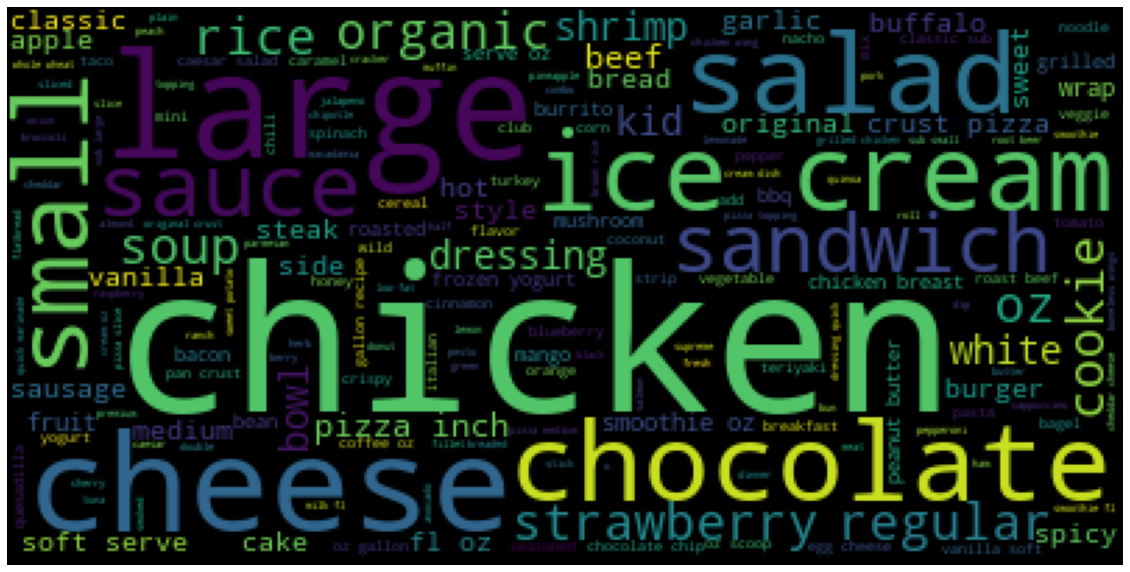

In [48]:
plt.rcParams["figure.figsize"] = (20,20)
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

> The first and foremost visulization I usually prefer although not much in practise is WordCloud.

> It makes the sense check much easier as interactive as we get to know that some of the words are repetitive more than others and hence we can expect them to be present in almost all the clusters.

> The results of our wordcloud were kind of expected. Chicken, ice cream, cheese, small , large, salad, these are the most frequent words and we usually expect almost all the food places to have them. When we make the sense check of clusters, we would have to keep in mind these words and infer accordingly.

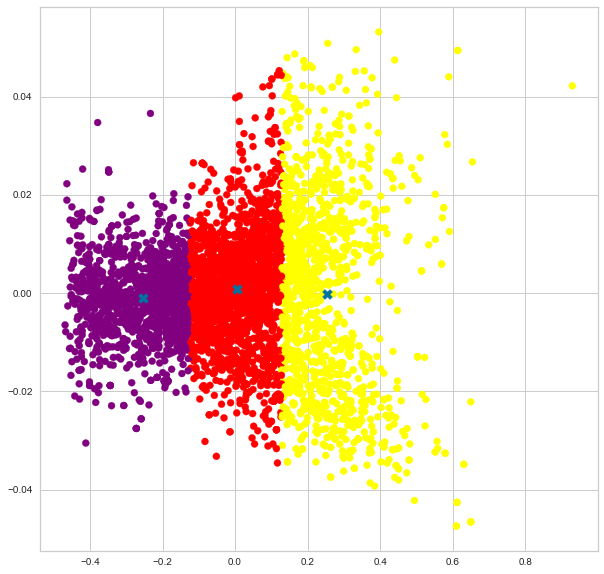

In [46]:
plt.rcParams["figure.figsize"] = (10,10)
color = {0:'red', 1: 'purple', 2:'yellow'}
plt.scatter(PCA_result[:,0],PCA_result[:,1], c=df['cluster'].map(color))
centroids = clf.cluster_centers_
centroid_cords=pca.transform(centroids)
plt.scatter(centroid_cords[:,0],centroid_cords[:,1], marker='X',s=100)

> the second visualization which I would go for is the cluster analysis which is a very common one when we are using KMeans. I could have used hierrarchial analysis and made dendogram but picking out some random samples and creating a dendogram in our case would be not fair.

> The clusters suggests that we have most of the outliers in yellow cluster and the all the clusters are joined with each other. This was a expected diagram as there are many restaurants having their unique cuisine which is not common with any other and on the other hand, many of them have the common dishes which we saw in wordcloud figure.

> As KMeans is an unsupervised learning approach we can never be 100% sure about the performance unless we knwo the results. Making a sense check of the results is the best way of analysis.

### SENSE CHECK: (Lets test our model)

In [58]:
df_check = pd.read_csv('MenuItem.csv')

In [59]:
df_check['cluster']=df['cluster']

In [60]:
df_check.head()

,Restaurant Name,Original food Item,cluster
0,Coffee Time,Garden Vegetable Sandwich,0
1,HoSan,Roasted Seaweed Snack,0
2,Weight Watchers,Muffins,1
3,Natural Sea,"Albacore Tuna, Solid White",1
4,World of Beer,Caesar Salad with Grilled Flat Iron Steak,0


In [72]:
c0=df_check[df_check['cluster']==0].sample(5)
c1=df_check[df_check['cluster']==1].sample(5)
c2=df_check[df_check['cluster']==2].sample(5)

print(c0)
print("======================================================================================")
print(c1)
print("======================================================================================")
print(c2)

     Restaurant Name                                 Original food Item  \
1427        Kirkwood  Chicken Breast Portions, Roasted Pepper & Lime...   
4431     Coffee Time                                 Boston Cream Donut   
1872    Nalley Fresh                                         Asian Wrap   
609          Emerils                          Alfredo Sauce Four Cheese   
628          Familia                       Swiss Muesli, No Added Sugar   

      cluster  
1427        0  
4431        0  
1872        0  
609         0  
628         0  
             Restaurant Name                        Original food Item  \
4028              Sea Choice  Salmon Fillet, Premium Selection Alaskan   
4433  Tropical Smoothie Cafe                         Kale & Apple Slaw   
2074           Harris Teeter                                 Pepperoni   
2750             Uncle Ben's                             Brown Basmati   
1247                   Pampa                          Mackerel Fillets   

      cl

### I randomly sample 5 values from each of the cluster and check them.
> ### Cluster 0 feels like the restaurant has more APPETIZERS like wraps, chicken breast.
> ### Cluster 1 feels like the restaurant has more ENTREES like Salmon Fillet, Mackarrel Fillet.
> ### Cluster 2 feels like the restaurant has a combination of BEVERAGES and MUNCHIES  like Smoothie, Pizza, wraps.
>> INterestingly in cluster 2 there is a same restaurant with different menu items and it gets identified as same. That's kinda amazing, what are the odds of same restaurant coming in our random sample. YAY!

In [76]:
c0=df_check[df_check['cluster']==0].sample(5)
c1=df_check[df_check['cluster']==1].sample(5)
c2=df_check[df_check['cluster']==2].sample(5)

print(c0)
print("======================================================================================")
print(c1)
print("======================================================================================")
print(c2)

                 Restaurant Name  \
1518    Bruster's Real Ice Cream   
1338  Golden Spoon Frozen Yogurt   
2651  Golden Spoon Frozen Yogurt   
3981                      Jayone   
2614                 Tabatchnick   

                                     Original food Item  cluster  
1518  Jamaican Me Crazy Ice Cream on a Waffle Cone, ...        0  
1338                Old Fashioned Vanilla Frozen Yogurt        0  
2651                  New York Cheesecake Frozen Yogurt        0  
3981                                  Crunchy Rice Roll        0  
2614                            Split Pea Soup, Organic        0  
                    Restaurant Name                 Original food Item  \
3124                   Tim Horton's  Sundried Tomato Asiago Parm Bagel   
1977                     Triple O's              Add Sauteed Mushrooms   
3897  Wild Oats Marketplace Organic        Dark Sweet Cherries, Pitted   
3516                        YoCream                    Tiramisu Gelato   
1925       

> ### Similar kind of pattern is observed for cluster 0 with more APPETIZERS and DESSERTS(For a change). Once again, we get two 'Golden Spoon Frozen Yogurt' and they are in same cluster.
> ### cluster 1 is kind of confusing as we have totally different food items fon it now. Lets wait for some more trials.
> ### And the BEVERAGES and MUNCHIES streak go on. I feel like cluster 2 is doing great.

In [79]:
c0=df_check[df_check['cluster']==0].sample(5)
c1=df_check[df_check['cluster']==1].sample(5)
c2=df_check[df_check['cluster']==2].sample(5)

print(c0)
print("======================================================================================")
print(c1)
print("======================================================================================")
print(c2)

           Restaurant Name              Original food Item  cluster
97            Veggie Patch                 Chick'n Nuggets        0
3530           Chick-fil-A                Coca-Cola, Small        0
4365              DiGiorno         Pizza, Ultimate Supreme        0
254   Furr's Family Dining           Red Velvet Layer Cake        0
1139           Duck Donuts  English Muffin, Egg And Cheese        0
                    Restaurant Name  \
1059                       Kirkwood   
887                      Triple O's   
3889                          Tyson   
933   Wild Oats Marketplace Organic   
2846                        Sally's   

                              Original food Item  cluster  
1059                                 Cordon Bleu        1  
887                                    Hashbrown        1  
3889                       Breakfast Bread Bowls        1  
933   Organic Granola Bars, Crunchy Oats & Honey        1  
2846                Cereal, Honey Puffed Delight        1

> ### For cluster 0 we again have all APPETIZERS
> ### Cluster 1 for a change is giving all BREAKFAST vibes. Will have to check one last time.
> ### CLuster 2 is for sure BEVERAGES and MUNCHIES.

In [80]:
c0=df_check[df_check['cluster']==0].sample(5)
c1=df_check[df_check['cluster']==1].sample(5)
c2=df_check[df_check['cluster']==2].sample(5)

print(c0)
print("======================================================================================")
print(c1)
print("======================================================================================")
print(c2)

     Restaurant Name                            Original food Item  cluster
3558    Planet Wings                      Hot Gourmet Garlic Sauce        0
976       Just Fresh                 Smoothies, The Green Smoothie        0
662       Cafe Zupas                         Chocolate Mousse Cake        0
4481           Tom's                   Vinegar & Salt Potato Chips        0
3487   Vocelli Pizza  Chicken Parmesan Pasta with Linguini - Party        0
               Restaurant Name  \
1499                Cafe Zupas   
3788                 Cereality   
902                  Cereality   
1637                High Liner   
1199  De Dutch Pannekoek House   

                                    Original food Item  cluster  
1499                  Salad Toppings, Tricolor Peppers        1  
3788                 Country Inn Crunch, Skim, Regular        1  
902                                           Wheaties        1  
1637  Pan-Sear Selects Haddock, Roasted Garlic & Herbs        1  
1199     

### ITS TIME FOR FINAL RESULTS:
> ### CLUSTER 1: APPETIZERS 
> ### CLUSTER 2: BREAKFAST
> ### CLUSTER 3: BEVERAGES AND MUNCHIES

>> Note: In 4 tests, it happened 4 times that the same restaurant with different dishes was classified as one. That's kind of amazing and a way we can look at it as a way of testing the model.